Description: Fundamentals of Data Science Homework 5
Author: Tanner Patrom

# Classification of Images

In this assignment, you will explore one possible way of classifying images of cats and bats given a very simplified 2-dimensional representation.

You will need to download the "_cats\_vs\_bats.zip_" file provided with this assignment.  Unzip the file in the same directory as this notebook for best results.

Look for **TODO** items in the text and code sections.  Complete the TODO items before moving on through the notebook.

You will need the following packages installed to run this notebook:

* `pandas`
* `numpy`
* `matplotlib`
* `scikit-learn`

All can be installed with Poetry (`poetry add`) or with `pip`.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# TODO: Make sure this matches the data directory on your system.
data_dir = Path("cats_vs_bats") 

In [56]:
cats_vs_bats_info = pd.read_csv(data_dir / "dataset_info_gray.csv")

We want the train and test partitions (there is a 'val' partition too, but we'll
ignore that for now).

In [57]:
cvb_train_info = cats_vs_bats_info[cats_vs_bats_info["partition"] == "train"]
cvb_test_info = cats_vs_bats_info[cats_vs_bats_info["partition"] == "test"]

The following code will load the images into Numpy arrays ($X\_img$), and store the label in a separate vector $y$.

In [58]:
# Images
X_img_train = np.asarray(
    [
        plt.imread(data_dir / img_path, format="jpeg")
        for img_path in cvb_train_info["image_path"].values
    ]
)
X_img_test = np.asarray(
    [
        plt.imread(data_dir / img_path, format="jpeg")
        for img_path in cvb_test_info["image_path"].values
    ]
)
# Labels
y_train = cvb_train_info["label"].values
y_test = cvb_test_info["label"].values
# Here's the sizes of each:
print(f"Training set size: {len(y_train)} images of shape {X_img_train[0].shape}.")
print(f"Testing set size:  {len(y_test)} images of shape {X_img_test[0].shape}.")

Training set size: 478 images of shape (32, 32).
Testing set size:  248 images of shape (32, 32).


There are $32 \times 32 = 1024$ pixels in each image.  That is a large number of features, and it probably won't give us good performance if we try to classify (with a simple model) using just those pixels.  Let's see a few examples of each class:

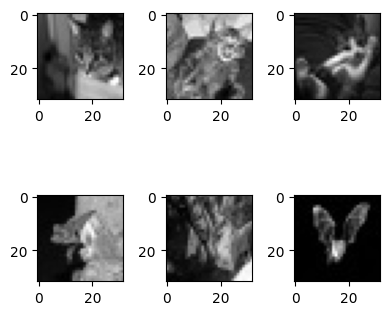

In [59]:
cat_samples = X_img_train[y_train == 1][:3]
bat_samples = X_img_train[y_train == 0][:3]

# plot a 3 x 3 grid of images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(4, 4))
for i in range(3):
    axes[0][i].imshow(cat_samples[i], cmap="gray")
    axes[1][i].imshow(bat_samples[i], cmap="gray")
for ax in axes.flat:
    ax.set_aspect("equal")
fig.tight_layout()
plt.show()

To allow us to create a simple model, we can do some aggressive _feature engineering_ by approximating each image with two values:  The _mean_ intensity across the image and the _standard deviation_ of the intensities of all pixels in the image.

So, our dataset will actually consist of $X = [(\mu_0, \sigma_0), (\mu_1, \sigma_1), \dots (\mu_N, \sigma_N)]$.

**TODO**
You can compute the mean of a Numpy array `arr` with `arr.mean()`, and the standard deviation with `arr.std()`.  You will want to do this for each image in the training and testing sets.  That can be done with Python list comprehensions, or by applying the `mean()` and `std()` methods along the correct axes using the `axis` argument.  In this case, the "correct" axes would be 1 and 2, so `axis=(1,2)` would work.

The easy way to make a "tidy" table from this data is to make a 2-D array where the means are the first row and the standard deviations are the second, then transpose it:
```
X = np.array([means, std_devs]).T
```
Where `means` represents the array of means of each image, and `std_devs` represents the array of standard deviations of each image.  The final shape of the arrays should be as follows:

`X_train`: (478,2)

`X_test` : (248, 2)

In [60]:
# TODO: fill in the right side of the assignment below.
X_train = np.array([X_img_train.mean(axis=(1,2)), X_img_train.std(axis=(1,2))]).T
# TODO: fill in the right side of the assignment below.
X_test = np.array([X_img_test.mean(axis=(1,2)), X_img_test.std(axis=(1,2))]).T


print(f"The shapes are: X_train: {X_train.shape}, X_test: {X_test.shape}")

The shapes are: X_train: (478, 2), X_test: (248, 2)


Now, let's fit a logistic regression model (a linear classification model) to our training data:

**TODO**: Use a `LogisticRegression` model (with default parameters) from Scikit-Learn.  Fit the model to `X_train`, `y_train` using the `fit()` method.  The model should be named `lr_model` to allow later cells to execute correctly.

See documentation here: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression>

In [61]:
lr_model = LogisticRegression()# TODO: Declare the model instance here
# TODO: call the `fit()` method below.
lr_model.fit(X_train, y_train)


LogisticRegression()

And we will make predictions on our test set to see how we did.

**TODO**: Call the `predict()` method of the model you trained above with `X_test` as the argument.  Store the result in `preds`.

In [62]:
preds = lr_model.predict(X_test) # TODO: predict labels for X_test here
acc = accuracy_score(y_test, preds)
print(
    f"Our model for predicting 'cat' or 'bat' based on image\n"
    f"intensity mean and standard deviation has accuracy: {acc*100:0.2f}%."
)

Our model for predicting 'cat' or 'bat' based on image
intensity mean and standard deviation has accuracy: 63.31%.


If everything was done correctly so far, you should see an accuracy of about 63%.  That isn't great, but it is better than just guessing (which we would expect to give 50% accuracy, since the two classes have equal numbers of samples).

### **TODO:** Answer the following question:

Do you _believe_ this is a meaningful model for determine "bat" or "cat" images in general?  Do you think it is capturing the _real_ differences between cats and bats, or is it measuring something else?   Explain your answer.

_HINT:_ It might be helpful to visualize more of the images, either by looking at the raw .jpg files or by using `matplotlib` to create a bigger grid like the one earlier in this notebook.

I believe this would be a better way to determine a cat or a bat in images if the dataset had more meaningful/distinguishable characteristics in the photos. A brief look at some of the photos shows that there are few features that are heavily recognizable to be a cat or a bat. For instance, a cat's face in certain photos take the profile of a bat spreading its wings. Some photos also do not have enough brightness or contrast between pixels. The model could possibly be picking up noise from the background of the subject.